In [ ]:
Linear Regression, y = b0 + b1*x ->
x bağımsız y bağımlı değişken durumunda

b1 -> intercept (katsayı), b0 -> intercept (grafiğin başlangıç noktasından sağa sola gidişini belirliyor)

In [1]:
#Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#burada kendi datasetimi oluşturuyorum
y_exp = np.linspace(1, 5, 30)
salary = []
salary_new = 35000
for i in range(30):
    up = int(np.random.randint(0,5000,1))
    down = int(np.random.randint(0,1000,1))
    salary_new += up
    salary_new -= down
    salary.append(salary_new)

df = pd.DataFrame({"Experience": y_exp,
                 "Salaries": salary})
df

,Experience,Salaries
0,1.000000,35800
1,1.137931,38923
2,1.275862,39674
3,1.413793,39289
4,1.551724,43024
5,1.689655,44989
6,1.827586,46273
7,1.965517,49046
8,2.103448,52309
9,2.241379,54258


In [4]:
df.head()

,Experience,Salaries
0,1.000000,35800
1,1.137931,38923
2,1.275862,39674
3,1.413793,39289
4,1.551724,43024


In [5]:
df.shape

(30, 2)

In [6]:
X = df.drop(["Salaries"], axis = True)
y = df["Salaries"]

In [7]:
#Scikitlearn ile öğrenme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24, 1), (6, 1), (24,), (6,))

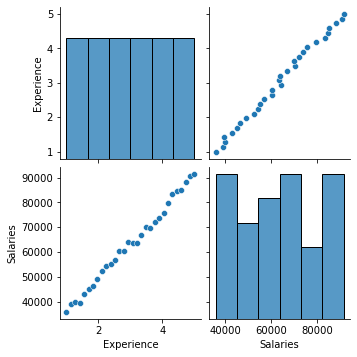

In [9]:
sns.pairplot(df);

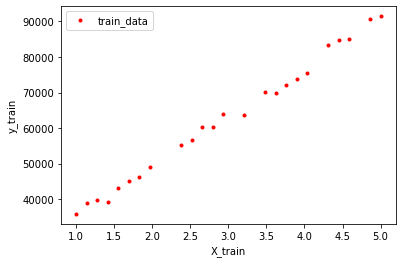

In [10]:
#Train data
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

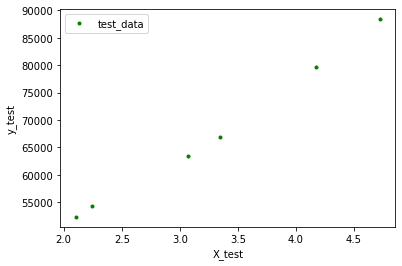

In [11]:
#Test data
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [12]:
#Modeli Eğitme
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test).round(1)

In [14]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama

,Original Salary,Predicted Salary
0,88345.0,87173.4
1,63483.0,64177.9
2,79604.0,79508.3
3,66848.0,68010.5
4,52309.0,50763.9
5,54258.0,52680.2


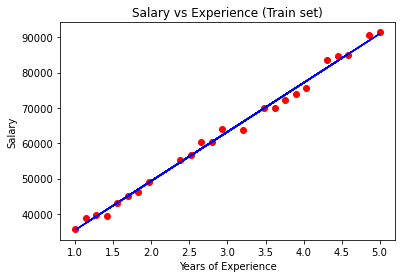

In [15]:
# tahmin regressionumuz ile train aşamasındaki örneklerin grafiği
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

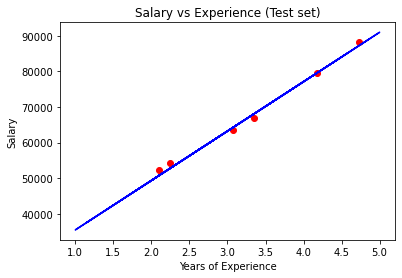

In [16]:
# tahim regressionumuz ile test aşamasındaki örneklerin grafiği
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
print("Training Accuracy : ", regressor.score(X_train, y_train))
print("Testing Accuracy : ", regressor.score(X_test, y_test))

Training Accuracy :  0.9939763495927926
Testing Accuracy :  0.9919367207385138
